# Plotting probabilities for objects and scenes

In [2]:
import numpy as np
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt

In [3]:
videos = "data/ucf-101/annotations/all_videos.txt"
videos = [l.strip().split()[0] for l in open(videos)]
videos = [video.split("/")[-1][:-4] for video in videos]
objectscores = "data/ucf-101/objectscores/"
scenescores = "data/ucf-101/scenescores-resnet50/"
ext = "/avg-features.npy"
wnids = [c.strip() for c in open("data/imagenet/wnids-12988.txt")]
object_labels = [wn.synset_from_pos_and_offset('n',int(wnid[1:])).lemma_names()[0] for wnid in wnids]
scene_labels = [c.strip() for c in open("data/places-365/words/places365-words-English.txt")]

In [4]:
all_obj = []
all_sce = []
for vidfile in videos:
    objavgfeat = np.load(objectscores + vidfile + ext)
    all_obj.append(objavgfeat)
    sceavgfeat = np.load(scenescores + vidfile + ext)
    all_sce.append(sceavgfeat)
    
all_obj = np.array(all_obj)
all_sce = np.array(all_sce)

In [72]:
x = np.argmax(all_obj, axis = 1)

In [73]:
y = np.bincount(x)
ii = np.nonzero(y)[0]
freq = np.vstack((ii,y[ii])).T
sorted_freq = freq[(-1*freq[:, 1]).argsort()]

In [75]:
np.sum(sorted_freq[:100], axis = 0)[1]

7958

(array([353.,   3.,   1.,   2.,   2.,   1.,   0.,   1.,   0.,   2.]),
 array([0.00000013, 0.01532017, 0.03064021, 0.04596024, 0.06128028,
        0.07660032, 0.09192036, 0.1072404 , 0.12256044, 0.13788049,
        0.15320052], dtype=float32),
 <BarContainer object of 10 artists>)

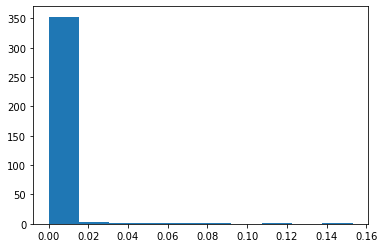

In [68]:
# np.set_printoptions(suppress=True)
# plt.hist(all_sce[0])

In [10]:
objsce_cooccur = np.matmul(all_obj.T, all_sce)

In [40]:
np.count_nonzero(all_sce == 0)

0

In [38]:
objsce_cooccur

array([[0.00005165, 0.0012574 , 0.00063127, ..., 0.00362015, 0.00131529,
        0.00092897],
       [0.00055756, 0.00052611, 0.00075029, ..., 0.00192826, 0.00032283,
        0.00056861],
       [0.00005685, 0.00036225, 0.0001853 , ..., 0.00036402, 0.00012206,
        0.00032104],
       ...,
       [0.00004526, 0.00002669, 0.00016389, ..., 0.00093308, 0.00005707,
        0.00044296],
       [0.00003518, 0.00002729, 0.00005392, ..., 0.00007606, 0.00002113,
        0.00003995],
       [0.00005372, 0.00079932, 0.00132672, ..., 0.00239246, 0.00064288,
        0.000903  ]], dtype=float32)

In [36]:
np.vstack((np.sum(objsce_cooccur, axis= 1), np.sum(all_obj, axis = 0))).T[:50]

array([[  0.5230135 ,   0.5230127 ],
       [  0.97757053,   0.97756696],
       [  0.45031816,   0.45031774],
       [  7.7662735 ,   7.766279  ],
       [  0.95368874,   0.953688  ],
       [  0.02759378,   0.02759377],
       [  1.1475875 ,   1.1475838 ],
       [  2.6410956 ,   2.6410782 ],
       [  5.1190963 ,   5.119052  ],
       [ 23.08818   ,  23.088125  ],
       [  4.232916  ,   4.232889  ],
       [  0.9213432 ,   0.9213434 ],
       [ 10.085921  ,  10.08591   ],
       [ 67.48157   ,  67.481514  ],
       [ 17.944527  ,  17.944456  ],
       [ 19.625568  ,  19.625563  ],
       [  3.981924  ,   3.9819217 ],
       [ 30.46026   ,  30.46015   ],
       [ 42.738567  ,  42.73826   ],
       [  7.9756255 ,   7.97562   ],
       [  3.4031737 ,   3.4031603 ],
       [  9.272732  ,   9.272718  ],
       [ 27.870504  ,  27.870518  ],
       [ 49.418938  ,  49.418526  ],
       [  4.8957176 ,   4.8957095 ],
       [ 17.000761  ,  17.000729  ],
       [ 15.7980175 ,  15.797928  ],
 

In [26]:
np.mean(objsce_cooccur, axis= 1).shape

(12988,)

In [27]:
np.mean(all_obj, axis = 0).shape

(12988,)